# TaikaGAN Project Documentation

Members:
1. Bautista, Michael
2. Domingo, Jaime
3. Tan, Allen

This serves as documentation for TaikaGAN, a Two-Domain Image-to-image Translation for Anime-styled Illustrations, which uses CycleGAN as its basis.

This project is based on the generator and discriminator models used in https://yanjia.li/gender-swap-and-cyclegan-in-tensorflow-2-0/. Since we didn't understand Tensorflow enough to have the capability to create Keras equivalents based on the Tensorflow code used in that implementation alone, we decided to use code from https://machinelearningmastery.com/cyclegan-tutorial-with-keras/ to train the model, and to allow for setting up the preprocessing necessary for the images.

The dataset was scraped from http://getchu.com (warning:NSFW), and the scraper and face detection tool used was adapted from https://github.com/Mckinsey666/Anime-Face-Dataset. This dataset was sorted manually over several days.
The dataset used had a total of 1254 male and 1254 female faces. These faces were downscaled to 128x128, and then upscaled to 256x256 in order to fit the input size of the CycleGAN model we used.

The following references were also used to make the project work:
- https://stackoverflow.com/questions/52826134/keras-model-subclassing-examples (for facilitating saving weights with the generator in particular, which involves ResNet blocks that are a subclass of the Keras Model class)
- https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers for helping with making the scraper work (not directly related to making the model work, but necessary for acquiring the dataset)

Here is an overview of the Cycle part of the CycleGAN. The two blocks on top are the generators, the block on the bottom-left is the discriminator.
<img src = "overview.png">

In [1]:
### SUPPORT CODE FOR THE REST OF THE DOCUMENTATION ###
# fix for memory issues
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

from models import make_generator_model
from preprocess import load_saved_dataset
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model
from numpy.random import randint
from numpy import vstack

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X
 
# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i%3])
	pyplot.show()

In [2]:
### LOAD DATASET ###
m, f = load_saved_dataset('proj_dataset.npz')

In [3]:
### LOAD GENERATOR MODELS ###
gen_1_model_f2m = make_generator_model(6)
gen_1_model_f2m.load_weights('g_model_BtoA_001254.h5')
# gen_1_model_m2f = make_generator_model(6)
# gen_1_model_m2f.load_weights('g_model_AtoB_001254.h5')
# load other epochs of generators here
gen_last_model_f2m = make_generator_model(6)
gen_last_model_f2m.load_weights('g_model_BtoA_003762.h5')
gen_last_model_m2f = make_generator_model(6)
# gen_last_model_f2m.load_weights('g_model_AtoB_003762.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


An issue encountered during training this model was that we were unable to complete the cycle since we were unable to save the A2B or m2f generator weights. Thus, the only results we can show are those for the f2m part of the cycle.

Epoch 1:
Female pictures:


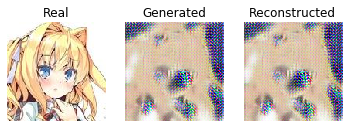

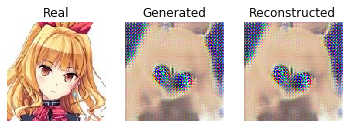

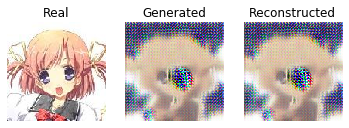

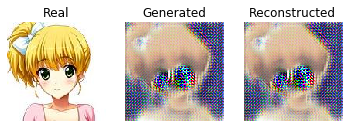

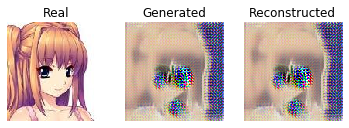

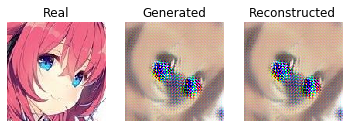

In [19]:
### SHOW EXAMPLE(S) ###
print('Epoch 1:')
m_real = select_sample(m, 1)
f_real = select_sample(f, 1)

f2m = gen_1_model_f2m.predict(f_real)
print('Female pictures:')
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_1_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_1_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_1_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_1_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_1_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

Epoch 3:
Female pictures:


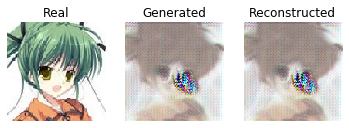

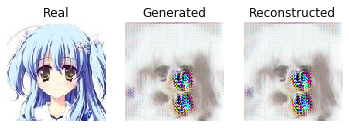

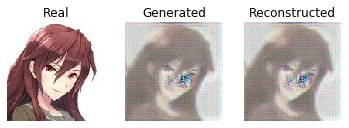

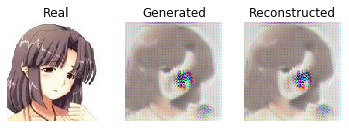

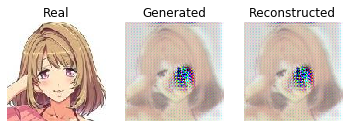

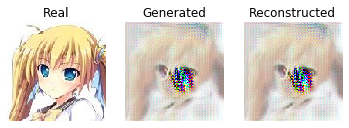

In [20]:
### SHOW EXAMPLE(S) ###
print('Epoch 3:')
m_real = select_sample(m, 1)
f_real = select_sample(f, 1)

f2m = gen_last_model_f2m.predict(f_real)
#f2m2f = gen_1_model_m2f.predict(f2m)
#m2f = gen_1_model_m2f.predict(m_real)
#m2f2m = gen_1_model_f2m.predict(m2f)

#print('Male pictures:')
#show_plot(m_real, f2m, f2m2f)
print('Female pictures:')
show_plot(f_real, f2m, f2m)

f_real = select_sample(f, 1)
f2m = gen_last_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)
f_real = select_sample(f, 1)
f2m = gen_last_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)
f_real = select_sample(f, 1)
f2m = gen_last_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)
f_real = select_sample(f, 1)
f2m = gen_last_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)
f_real = select_sample(f, 1)
f2m = gen_last_model_f2m.predict(f_real)
show_plot(f_real, f2m, f2m)

Issues encountered:

- Dataset was too small, so the discriminator wound up memorizing the dataset. The generator knows where the faces are, sure, but it doesn't know what to do with them.
- We were able to dump the loss values off of the training, but we have not plotted the values (yet). However, empirically, the generator had much bigger loss (in part because of loss weights and in part because the discriminator learned much more easily)
- Implementation of loading entire dataset into memory was inefficient. While it made training quicker, it led to much higher RAM usage. This led to the model only being trainable on one machine with 20GB of RAM, since it consumed too much RAM.
- Another problem with the dataset was that we had to work with unpaired images, forcing us to use CycleGAN.
- As mentioned earlier, we were unable to complete the cycle thanks to the generator screwing up and failing to save weights.